In [227]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import tensorflow as tf 
import os
print(os.listdir("../desktop"))

['Screen Shot 2021-02-14 at 12.12.41 PM.png', 'Screen Shot 2021-02-18 at 4.02.27 PM.png', 'Screen Shot 2021-06-09 at 1.14.23 AM.png', 'housing.csv', 'housepricedata.csv', 'Classification Practice.ipynb', 'Day 11.ipynb', 'Salary_Data.csv', 't10k-images-idx3-ubyte', 'Untitled1.ipynb', 'lab10_1.cpp', 'House Price Predictions .ipynb', '.DS_Store', 'Screen Shot 2021-05-12 at 12.40.06 PM.png', 'Screen Shot 2021-04-21 at 11.33.54 PM.png', 'Screen Shot 2021-02-17 at 5.29.41 PM.png', 'Screen Shot 2021-05-03 at 11.20.03 PM.png', 'archive', 'Screen Shot 2021-05-12 at 11.42.29 AM.png', 'Screen Shot 2021-05-12 at 12.56.31 PM.png', '.localized', 'Relocated Items.nosync', 'Screen Shot 2021-06-21 at 10.06.51 AM.png', 'Untitled.ipynb', 'Screen Shot 2021-04-24 at 1.07.52 PM.png', 'Screen Shot 2021-04-22 at 10.12.20 AM.png', 'Screen Shot 2021-06-29 at 10.56.46 PM.png', 'Screen Shot 2021-04-23 at 2.41.51 AM.png', 'Screen Shot 2021-02-18 at 4.02.19 PM.png', 't10k-labels-idx1-ubyte', 'Untitled2.ipynb', 'Han

In [228]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [229]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train.shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)


In [230]:
# label encoding
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

In [231]:
# split the train and validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (48000, 28, 28)
x_test shape (12000, 28, 28)
y_train shape (48000, 10)
y_test shape (12000, 10)


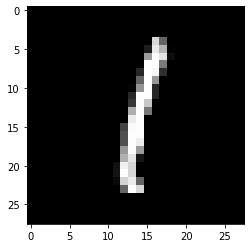

In [232]:
plt.imshow(x_train[4][:,:],cmap='gray')
plt.show()

In [233]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [234]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [235]:
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)

x_train.shape (48000, 28, 28)
x_test.shape (12000, 28, 28)


In [236]:
# sequential model to initialise our ann and dense module to build the layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [254]:
# ANN
model = Sequential()
model.add(Dense(10, input_shape = (28,28), activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [255]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 28, 10)            290       
_________________________________________________________________
dense_64 (Dense)             (None, 28, 10)            110       
_________________________________________________________________
flatten_12 (Flatten)         (None, 280)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 10)                2810      
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [256]:
opd = tf.keras.optimizers.Adam(
    learning_rate=0.001)

In [257]:
model.compile(optimizer = opd, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [258]:
hist = model.fit(x_train, y_train, batch_size = 28, epochs = 64, validation_data=(x_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 8s 165us/sample - loss: 0.4685 - accuracy: 0.8643 - val_loss: 0.2518 - val_accuracy: 0.9236
Epoch 2/64
48000/48000 [==============================] - 7s 140us/sample - loss: 0.2407 - accuracy: 0.9294 - val_loss: 0.1922 - val_accuracy: 0.9428
Epoch 3/64
48000/48000 [==============================] - 7s 141us/sample - loss: 0.2007 - accuracy: 0.9411 - val_loss: 0.1695 - val_accuracy: 0.9486
Epoch 4/64
48000/48000 [==============================] - 7s 148us/sample - loss: 0.1793 - accuracy: 0.9463 - val_loss: 0.1588 - val_accuracy: 0.9511
Epoch 5/64
48000/48000 [==============================] - 7s 150us/sample - loss: 0.1679 - accuracy: 0.9505 - val_loss: 0.1459 - val_accuracy: 0.9561
Epoch 6/64
48000/48000 [==============================] - 7s 144us/sample - loss: 0.1575 - accuracy: 0.9527 - val_loss: 0.1374 - val_accuracy: 0.9597
Epoch 7/64
48000/48000 [==========================

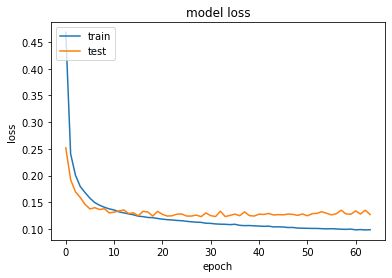

In [259]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()